In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt
import numpy as np
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
class_names = ["acne-prone-skin", "dry-skin", "oily-skin", "healthy"]
print("Classes:", class_names)

Classes: ['acne-prone-skin', 'dry-skin', 'oily-skin', 'healthy']


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [4]:
MODEL_PATH = "/Users/Admin/Desktop/project/models/efficientnet_skin_classifier.pth"

model = EfficientNet.from_name("efficientnet-b0")
num_features = model._fc.in_features
model._fc = nn.Linear(num_features, len(class_names))

model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

print("Model Loaded Successfully!")

Model Loaded Successfully!


In [5]:
def predict_skin_type(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        probabilities = torch.softmax(output, dim=1)[0]

    predicted_idx = torch.argmax(probabilities).item()
    predicted_label = class_names[predicted_idx]
    
    return image, predicted_label, probabilities.cpu().numpy()

In [11]:
test_image_path = "/Users/Admin/Desktop/project/face/healthy/download (8).jpeg"

image, predicted_label, probs = predict_skin_type(test_image_path)

print("Predicted Skin Type:", predicted_label)
print("\nConfidence Scores:")
for i, c in enumerate(class_names):
    print(f"{c}: {probs[i]:.4f}")

Predicted Skin Type: healthy

Confidence Scores:
acne-prone-skin: 0.2477
dry-skin: 0.0986
oily-skin: 0.0328
healthy: 0.6208


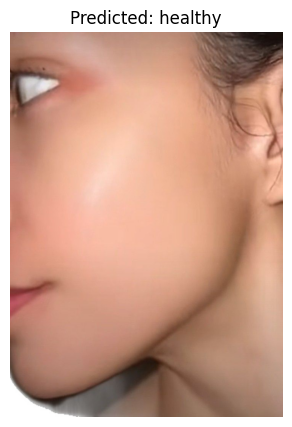

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}")
plt.show()